# Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
```
a. Measure the dispersion in both and interpret the results.
b. Calculate mean and 5% confidence interval and plot it in a graph
c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.
d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.
```

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("data (1).csv")

In [3]:
df.shape

(100, 3)

In [4]:
df.rename(columns = {' Blood Pressure Before (mmHg)':'Blood Pressure Before', ' Blood Pressure After (mmHg)': 'Blood Pressure After'}, inplace = True)

<Axes: xlabel='Blood Pressure Before', ylabel='Count'>

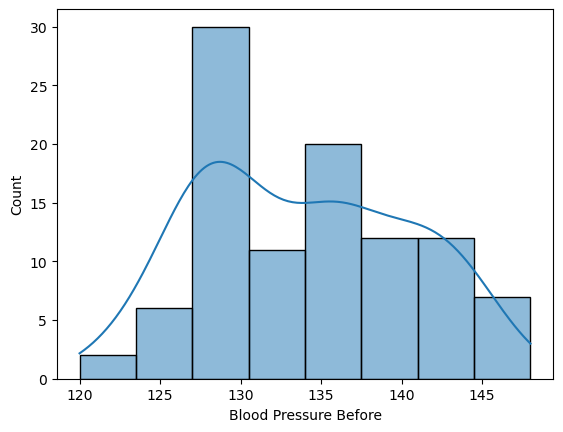

In [5]:
import seaborn as sns

sns.histplot(df["Blood Pressure Before"], kde=True)

<Axes: xlabel='Blood Pressure After', ylabel='Count'>

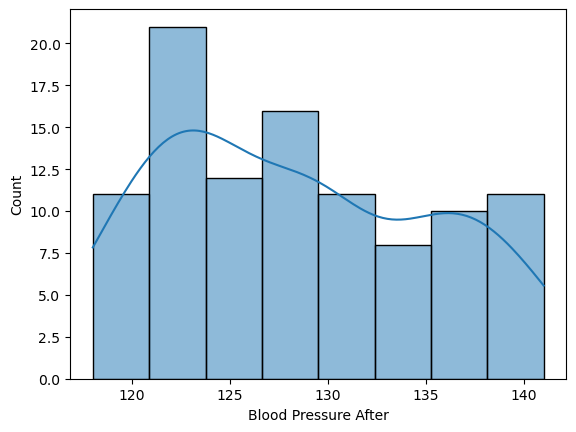

In [6]:
sns.histplot(df["Blood Pressure After"], kde=True)

### a. Measure the dispersion in both and interpret the results.


In [7]:
std_bp_before = np.std(df['Blood Pressure Before'])
var_bp_before = np.var(df['Blood Pressure Before'])

print(f"Standard Deviation of Blood pressure before: {std_bp_before}")
print(f"Variance of Blood pressure before: {var_bp_before}")

Standard Deviation of Blood pressure before: 6.5652037287505385
Variance of Blood pressure before: 43.10189999999998


In [8]:
std_bp_after = np.std(df['Blood Pressure After'])
var_bp_after = np.var(df['Blood Pressure After'])

print(f"Standard Deviation of Blood pressure after: {std_bp_after}")
print(f"Variance of Blood pressure before: {var_bp_after}")

Standard Deviation of Blood pressure after: 6.853495458523338
Variance of Blood pressure before: 46.97040000000002


### b. Calculate mean and 5% confidence interval and plot it in a graph

In [16]:
mean_bp_before = np.mean(df['Blood Pressure Before'])

In [17]:
mean_bp_after = np.mean(df['Blood Pressure After'])

In [18]:
confidence_interval_before = stats.t.interval(0.05, 100, loc=mean_bp_before, scale=std_bp_before)

In [19]:
confidence_interval_after = stats.t.interval(0.05, 100, loc=mean_bp_after, scale=std_bp_after)

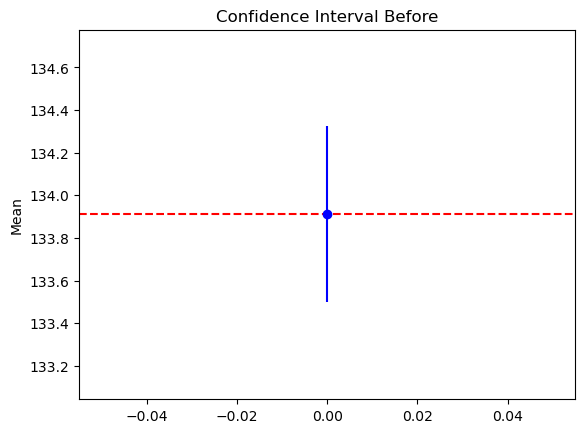

In [20]:
import matplotlib.pyplot as plt

mean = mean_bp_before
margin_error = (confidence_interval_before[1] - confidence_interval_before[0]) / 2

plt.errorbar(0, mean, yerr=margin_error, fmt='o', color='b')
plt.axhline(y=mean, color='r', linestyle='--')

plt.ylim(confidence_interval_before[0] - 1.1 * margin_error, confidence_interval_before[1] + 1.1 * margin_error)
plt.ylabel('Mean')
plt.title('Confidence Interval Before')
plt.show()

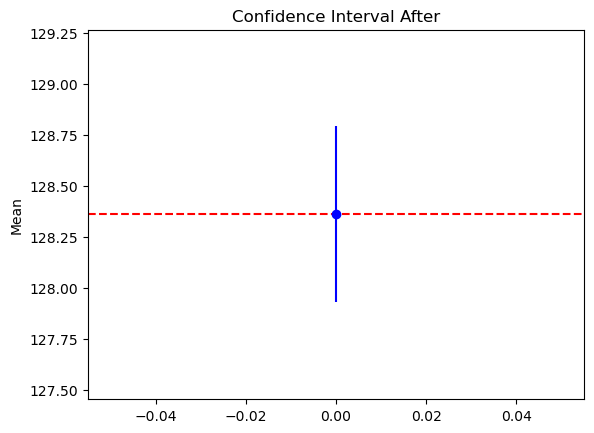

In [21]:
import matplotlib.pyplot as plt

mean = mean_bp_after
margin_error = (confidence_interval_after[1] - confidence_interval_after[0]) / 2

plt.errorbar(0, mean, yerr=margin_error, fmt='o', color='b')
plt.axhline(y=mean, color='r', linestyle='--')

plt.ylim(confidence_interval_after[0] - 1.1 * margin_error, confidence_interval_after[1] + 1.1 * margin_error)
plt.ylabel('Mean')
plt.title('Confidence Interval After')
plt.show()

### c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [22]:
std_bp_before = np.std(df['Blood Pressure Before'])
std_bp_after = np.std(df['Blood Pressure After'])

print(f"Standard Deviation of Blood pressure before: {std_bp_before}")
print(f"Standard Deviation of Blood pressure after: {std_bp_after}")

Standard Deviation of Blood pressure before: 6.5652037287505385
Standard Deviation of Blood pressure after: 6.853495458523338


In [23]:
mad_before = np.mean(np.abs(df["Blood Pressure Before"] - np.mean(df["Blood Pressure Before"])))
mad_after = np.mean(np.abs(df["Blood Pressure After"] - np.mean(df["Blood Pressure After"])))

print(f"Mean absolute deviation of Blood pressure before: {mad_before}")
print(f"Mean absolute deviation of Blood pressure after: {mad_after}")

Mean absolute deviation of Blood pressure before: 5.7118
Mean absolute deviation of Blood pressure after: 5.9


# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [24]:
df = df[["Blood Pressure Before", "Blood Pressure After"]]

In [25]:
df.corr()

,Blood Pressure Before,Blood Pressure After
Blood Pressure Before,1.000000,0.977949
Blood Pressure After,0.977949,1.000000


In [26]:
import scipy.stats as stats

correlation_coefficient, p_value = stats.pearsonr(df["Blood Pressure Before"], df["Blood Pressure After"])

# Null Hypothesis (H0): There is no correlation between the two variables.
# Alternate Hypothesis (H1): There is a correlation between the two variables.

if p_value < 0.01:
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")
    
print(f"correlation_coefficient: {correlation_coefficient}, p_value: {p_value}")

We reject the null hypothesis
correlation_coefficient: 0.9779485966556017, p_value: 1.809738143306857e-68
